In [2]:
import os
import pandas as pd
from scipy.io import wavfile
from utils import Datainfo
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
dir = Datainfo["dir"]
pos = Datainfo["positives"]
neg = Datainfo["negatives"]
templates = Datainfo["backgrounds"]

In [4]:
def audioDF(dir, ext):
    fileList = [x for x in os.listdir(dir) if x.endswith(ext)]
    filePath = [os.path.join(dir, x) for x in fileList]
    df = pd.DataFrame({
        'files': fileList,
        'paths': filePath,
    })
    return df

In [5]:
def durAudio(filepath):
    rate, data = wavfile.read(filepath)
    return len(data)/rate

In [6]:
posData = audioDF(pos, "wav")
posData.head()

,files,paths
0,positive1.wav,e:\Prototype\WWmodule\Data\positives\positive1...
1,positive10.wav,e:\Prototype\WWmodule\Data\positives\positive1...
2,positive11.wav,e:\Prototype\WWmodule\Data\positives\positive1...
3,positive12.wav,e:\Prototype\WWmodule\Data\positives\positive1...
4,positive13.wav,e:\Prototype\WWmodule\Data\positives\positive1...


In [7]:
posData["durations"] = [durAudio(x) for x in posData["paths"]]
posData.head()

,files,paths,durations
0,positive1.wav,e:\Prototype\WWmodule\Data\positives\positive1...,1.04
1,positive10.wav,e:\Prototype\WWmodule\Data\positives\positive1...,0.55
2,positive11.wav,e:\Prototype\WWmodule\Data\positives\positive1...,0.55
3,positive12.wav,e:\Prototype\WWmodule\Data\positives\positive1...,0.75
4,positive13.wav,e:\Prototype\WWmodule\Data\positives\positive1...,0.65


In [8]:
posData.describe()

,durations
count,47.000000
mean,0.879362
std,0.232345
min,0.500000
25%,0.725000
50%,0.870000
75%,1.000000
max,1.420000


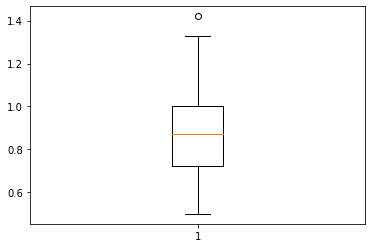

In [9]:
plt.boxplot(x=posData["durations"])
plt.show()